# House Price Prediction - regression using Boston Housing Price Dataset

- Regression doesn't mean logistic regression as logistic regression isn't regression algorithm - it's classification algorithm

In [46]:
# importing the modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# loading the datatset
from keras.datasets import boston_housing

In [48]:
(train_data, train_targets),  (test_data, test_targets) = boston_housing.load_data()

In [49]:
train_data.shape

(404, 13)

In [50]:
test_data.shape

(102, 13)

In [51]:
print(len(train_targets))
print(train_targets)

404
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 

- preparing the data

In [52]:
# normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [53]:
test_data -=  mean
test_data /= std

- building the model

In [54]:
# defining the model
from keras import models
from keras import layers

In [55]:
def build_model():
    model = models.Sequential()

    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

- Crossfold validation


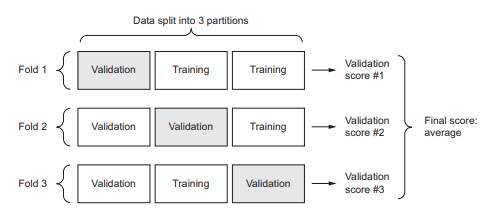

In [56]:
# validating the approach using crossfold validation 

k = 4
num_val_samples = len(train_data) // k
num_epochs = 1000
all_scores = []

for i in range(k):
    print('preprocessing fold #',i)
    val_data = train_data[i * num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1)*num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis=0
    )

    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0
    )

    model = build_model()
    model.fit(partial_train_data,partial_train_targets,
              epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,val_mae = model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

preprocessing fold # 0


preprocessing fold # 1
preprocessing fold # 2
preprocessing fold # 3


In [57]:
all_scores

[2.3267030715942383, 2.9052772521972656, 2.714613914489746, 2.53611159324646]

In [58]:
np.mean(all_scores)

2.6206764578819275

In [60]:
# saving the validation logs at each fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold # ',i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]

    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]

    partial_train_data=np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
         axis=0
    )

    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
         axis=0    
    )

    model = build_model()

    history = model.fit(partial_train_data,partial_train_targets,
                        validation_data=(val_data,val_targets),
                        epochs=num_epochs,batch_size=1,verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [62]:
# building the history of successive mean K-fold validation scores

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

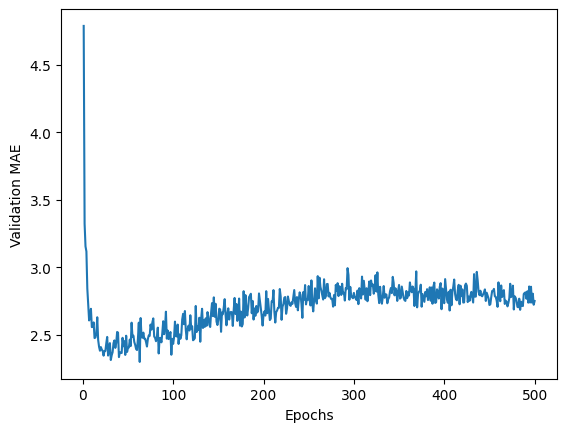

In [63]:
# plotting validation success

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [71]:
print(average_mae_history[10:])

[2.5597362518310547, 2.591636538505554, 2.4761061668395996, 2.479841470718384, 2.5107972025871277, 2.6297422647476196, 2.4619674682617188, 2.4116095304489136, 2.3819172978401184, 2.409047842025757, 2.391132950782776, 2.3809654116630554, 2.3454830646514893, 2.3791732490062714, 2.380866289138794, 2.437503695487976, 2.484230399131775, 2.3463281095027924, 2.396105259656906, 2.438198506832123, 2.3133992552757263, 2.3489866256713867, 2.3713842630386353, 2.4382233023643494, 2.4585267901420593, 2.4032459557056427, 2.440158098936081, 2.5207508206367493, 2.5163413882255554, 2.3350414037704468, 2.369807153940201, 2.3684688210487366, 2.365150898694992, 2.4776318073272705, 2.415476828813553, 2.4529786705970764, 2.351099371910095, 2.493065655231476, 2.3733933568000793, 2.4029418230056763, 2.405979335308075, 2.464280903339386, 2.416250765323639, 2.589699864387512, 2.4844762086868286, 2.493979275226593, 2.4465603828430176, 2.4252853393554688, 2.3943600058555603, 2.387186050415039, 2.470033347606659, 2

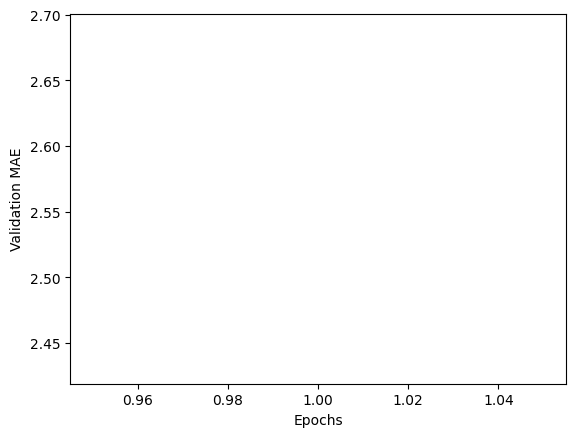

In [79]:
p=average_mae_history[10:]
# plotting validation success, excluding the first 10 data points

def smooth_curve(points,factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous* factor+point *(1-factor))
        else:
            smoothed_points.append(point)
        return smoothed_points
    
smooth_mae_history = smooth_curve(p)

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [66]:
# training the model

model = build_model()

model.fit(train_data,train_targets,
          epochs=80,batch_size=16,verbose=0)
test_mae_score, test_mae_score =model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 19.3627 - mae: 2.7520


In [67]:
test_mae_score

2.7519586086273193